In [5]:
from helpers import laplace, divergence, gradient, ImageFitting
from siren import Siren

import torch
from torch import nn
import torch.nn.functional as F
from torch.utils.data import DataLoader, Dataset
import os

from PIL import Image
from torchvision.transforms import Resize, Compose, ToTensor, Normalize
import numpy as np
import skimage
import matplotlib.pyplot as plt

import time

In [6]:
sidelength=14

cameraman = ImageFitting(sidelength)
dataloader = DataLoader(cameraman, batch_size=1, pin_memory=True, num_workers=0)

img_siren = Siren(in_features=2, out_features=1, hidden_features=100,
                  hidden_layers=3, outermost_linear=True)

Step 0, Total loss 0.000002


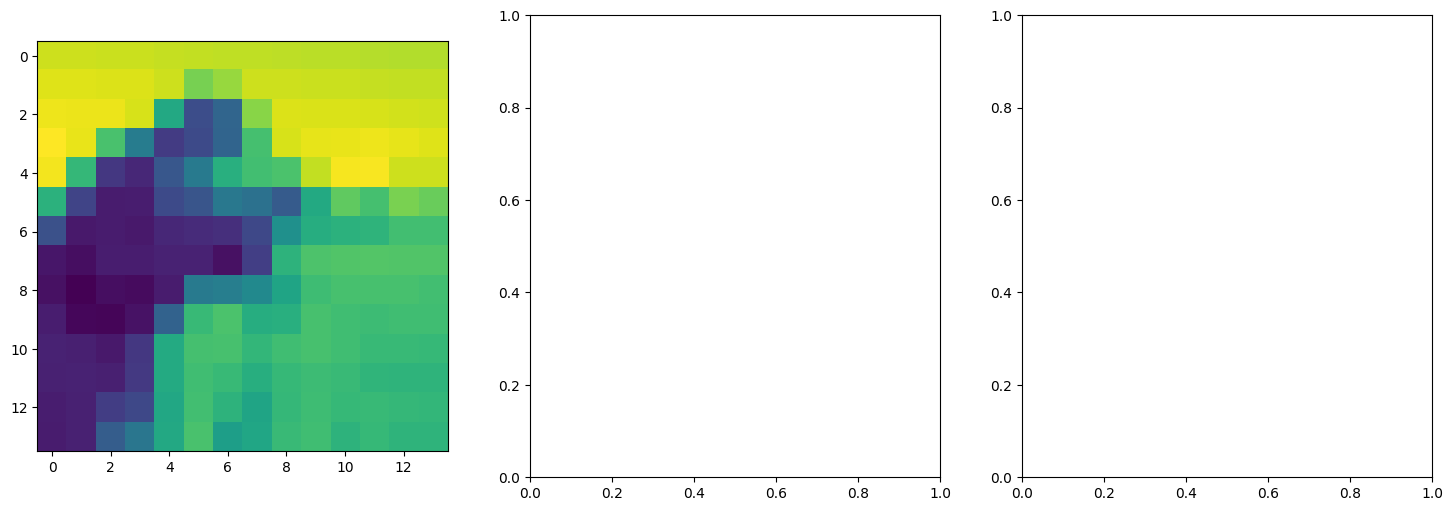

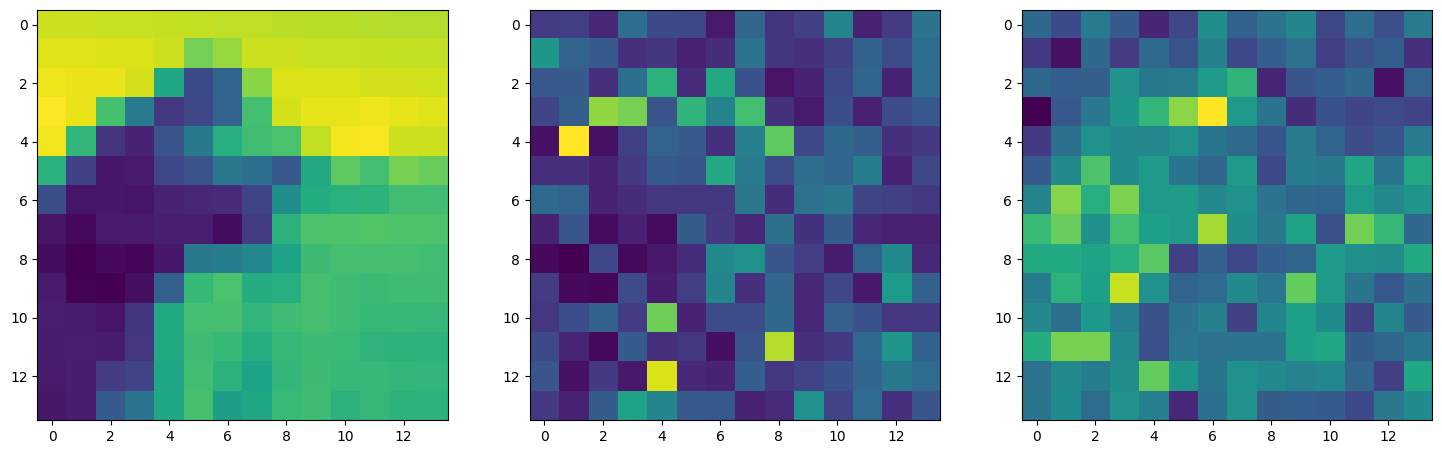

Step 10, Total loss 0.000433


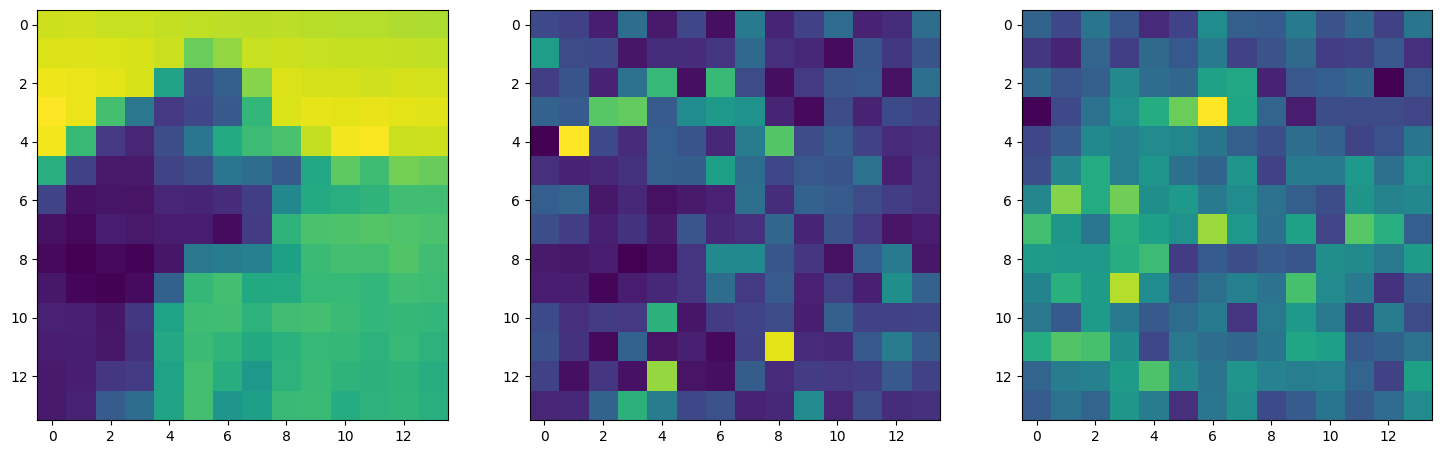

Step 20, Total loss 0.000150


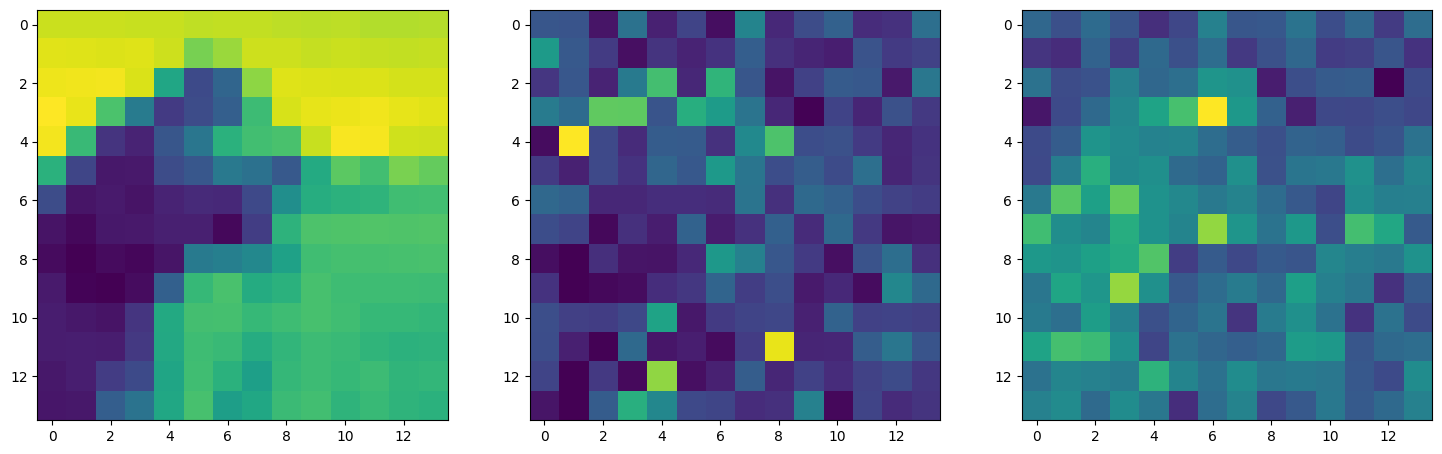

Step 30, Total loss 0.000060


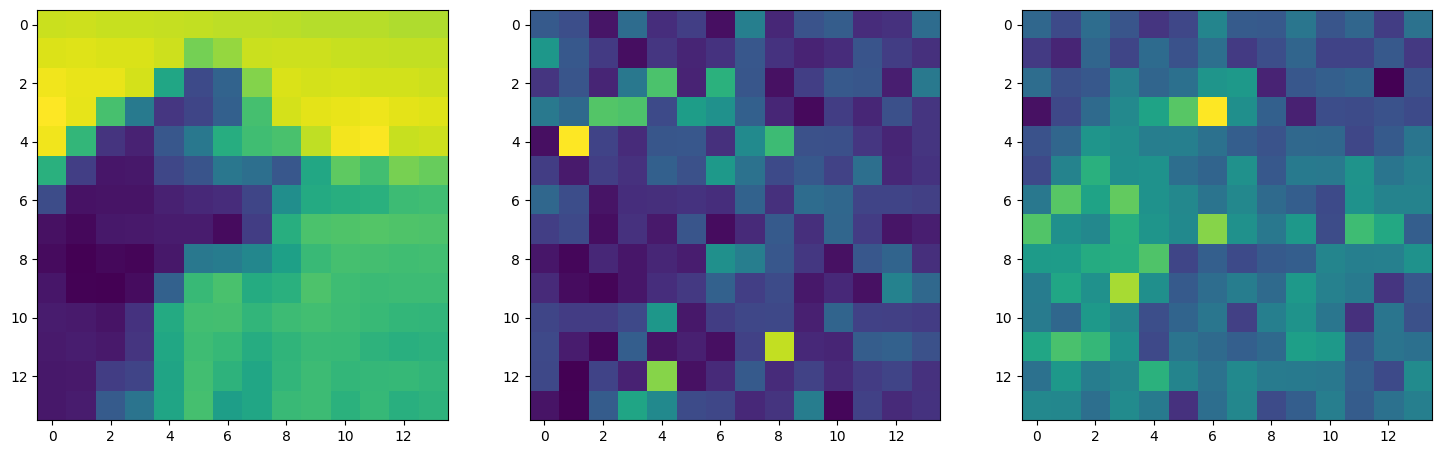

Step 40, Total loss 0.000020


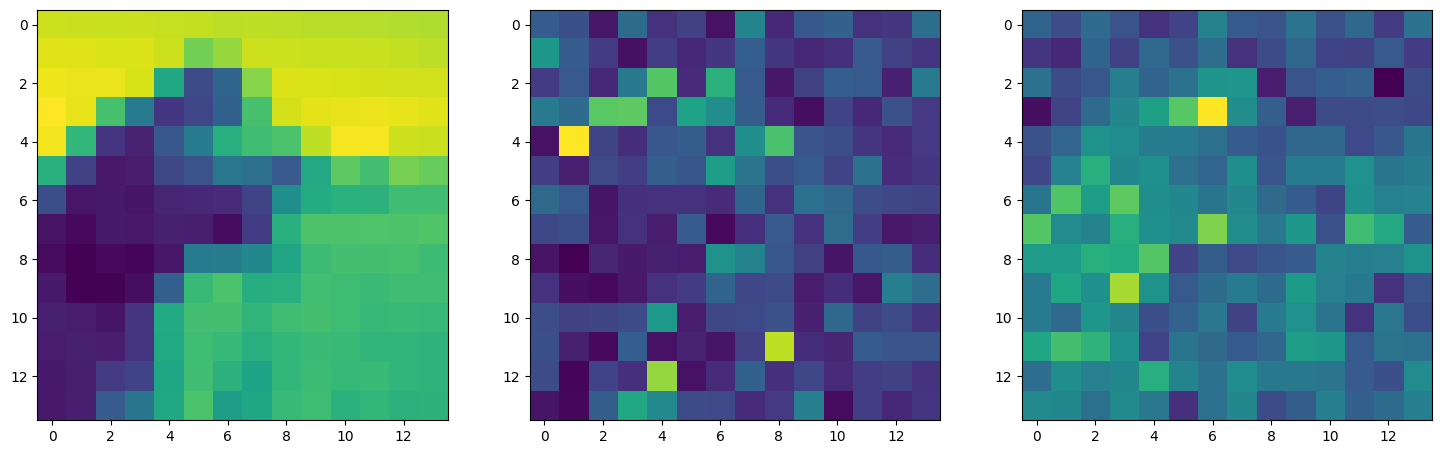

Step 50, Total loss 0.000006


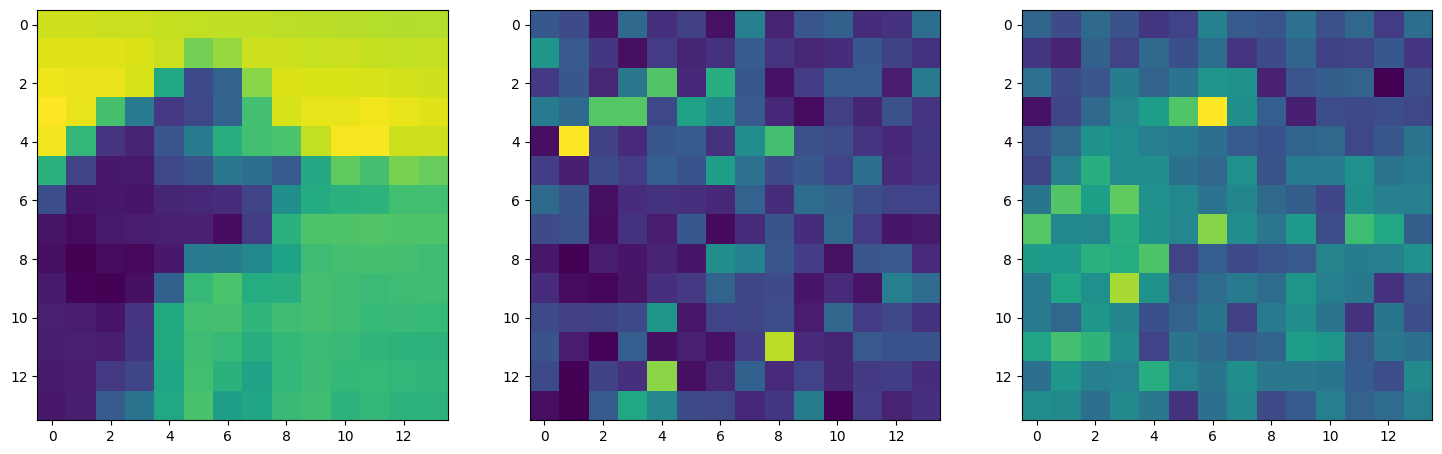

Step 60, Total loss 0.000003


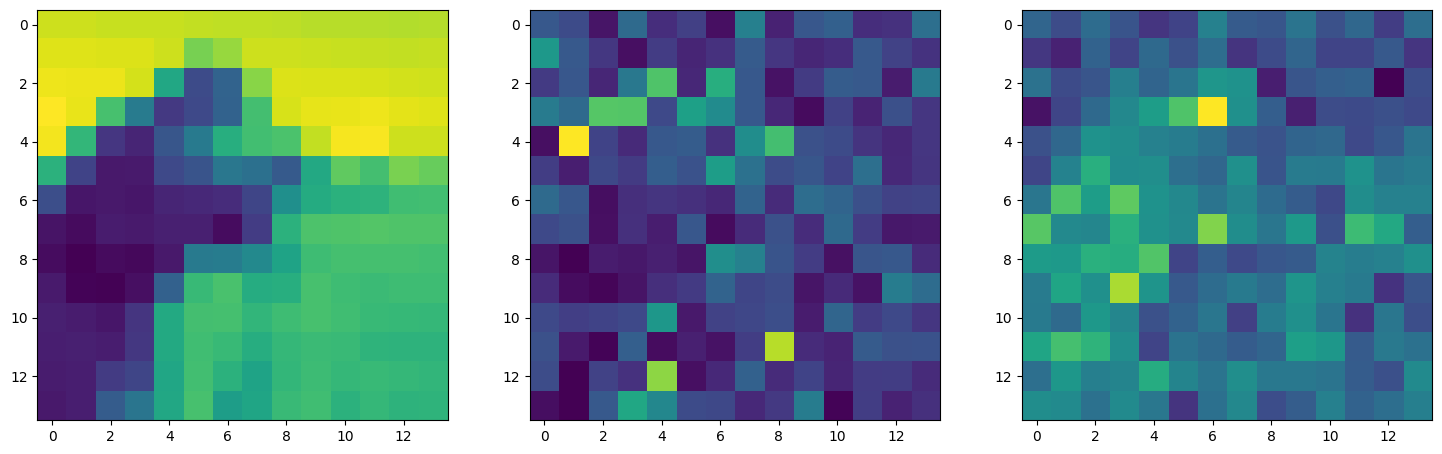

Step 70, Total loss 0.000001


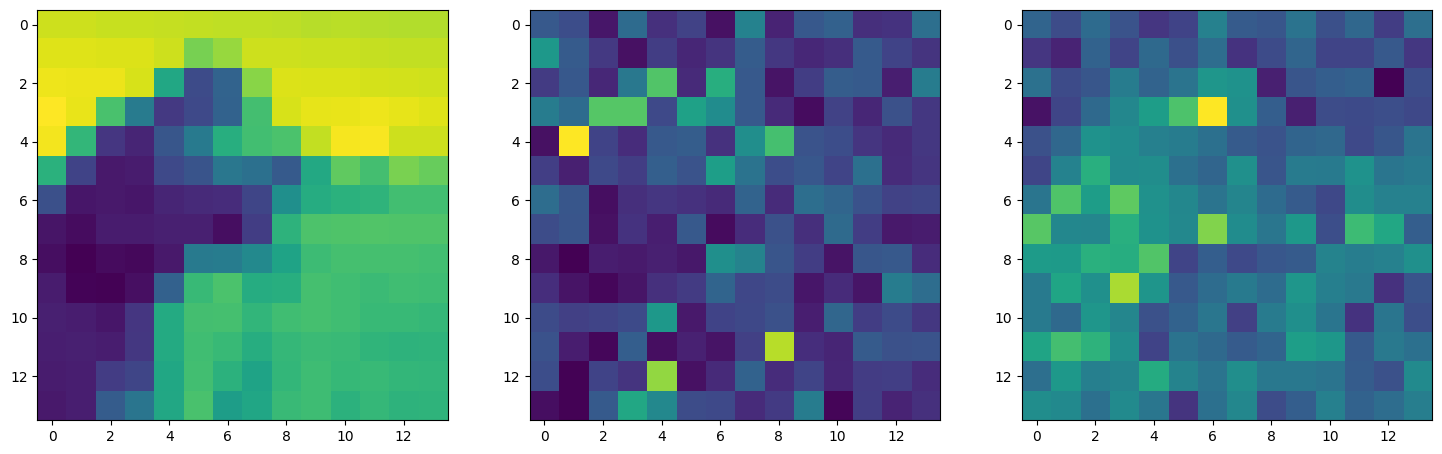

Step 80, Total loss 0.000001


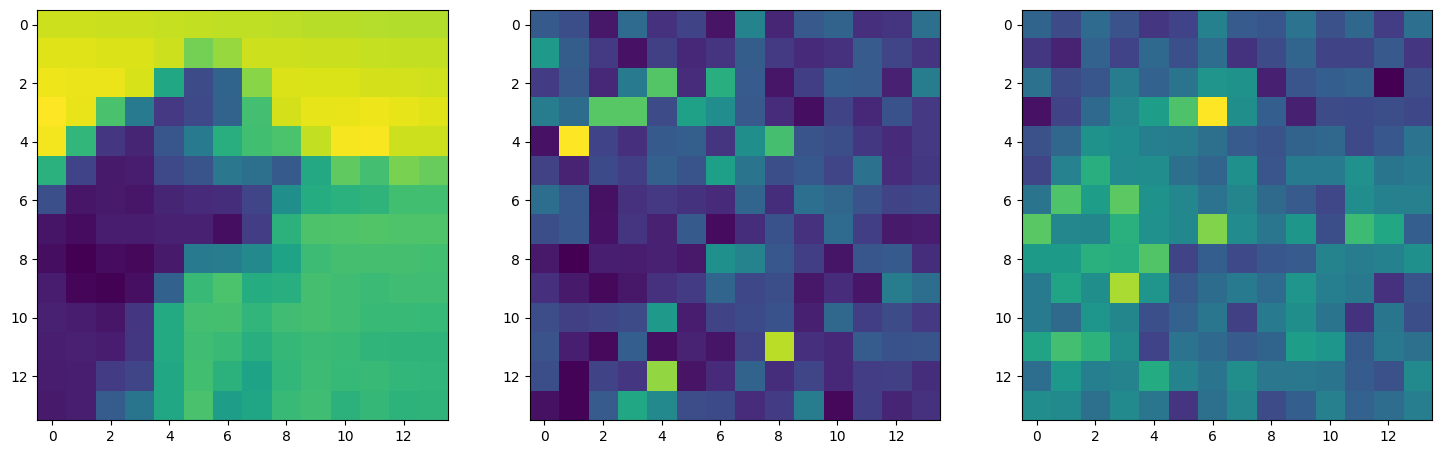

Step 90, Total loss 0.000001


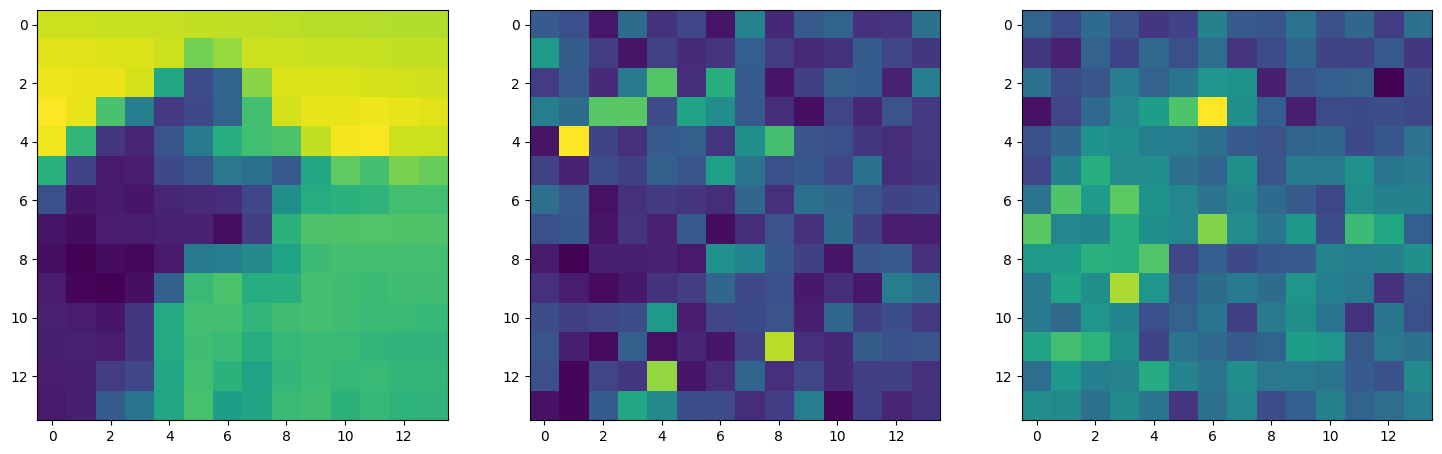

Step 100, Total loss 0.000000


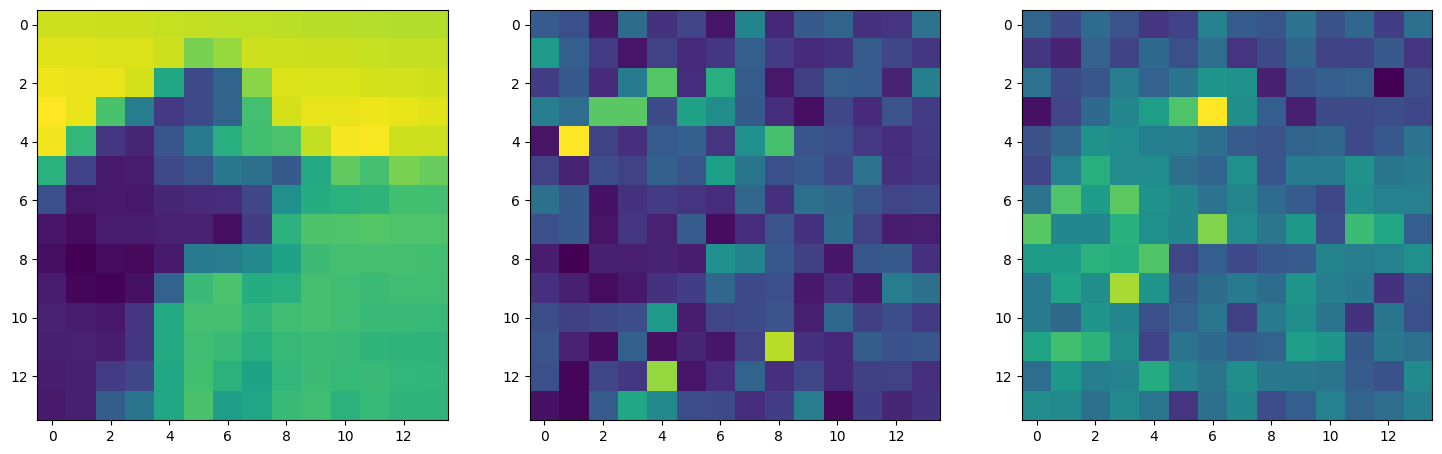

Step 110, Total loss 0.000000


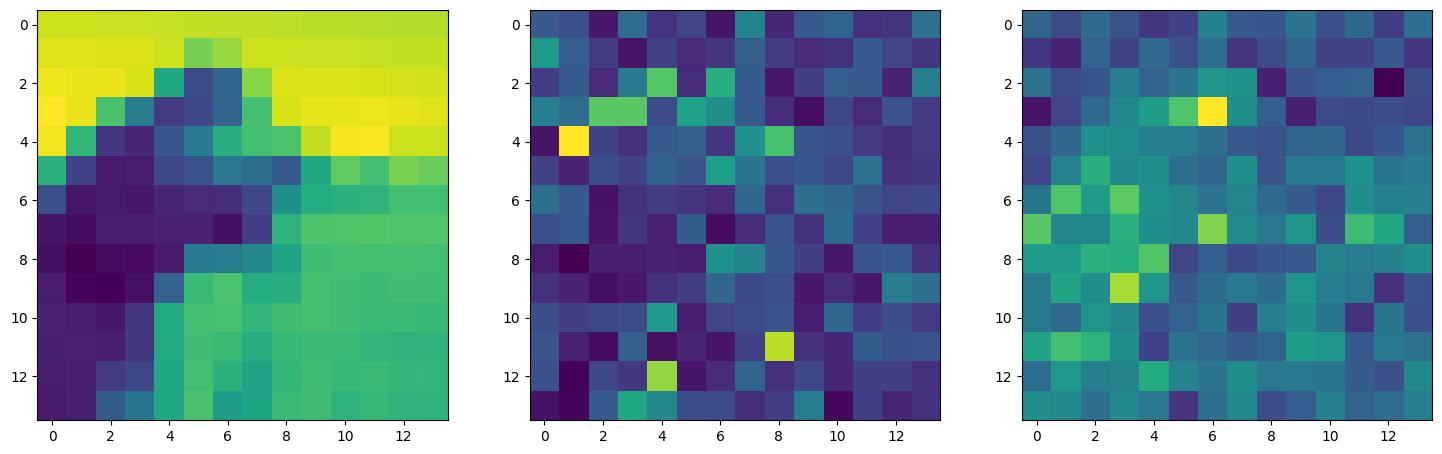

Step 120, Total loss 0.000000


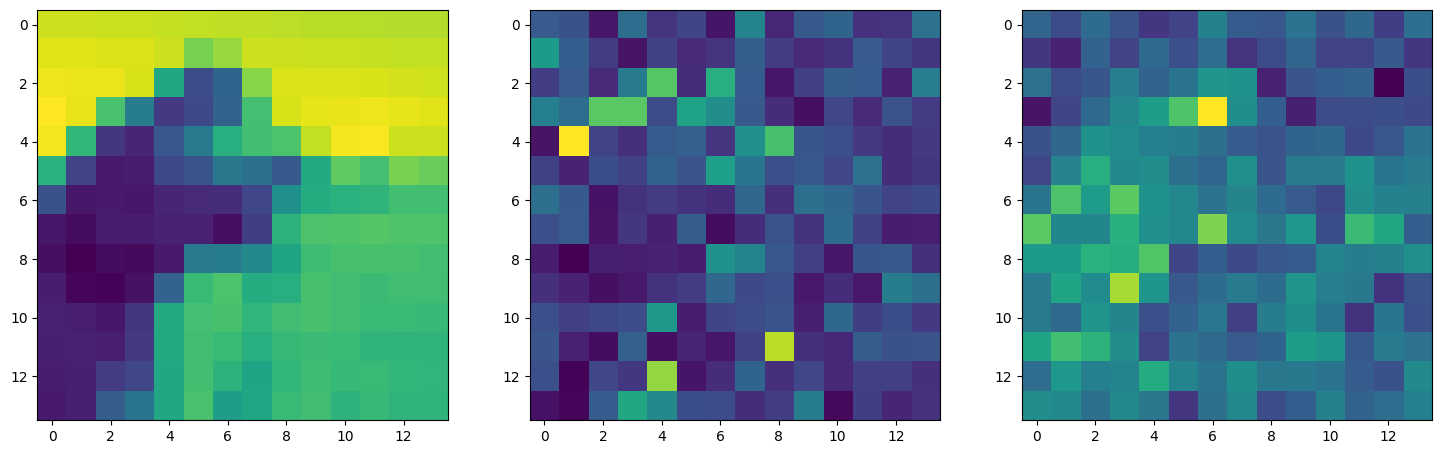

Step 130, Total loss 0.000000


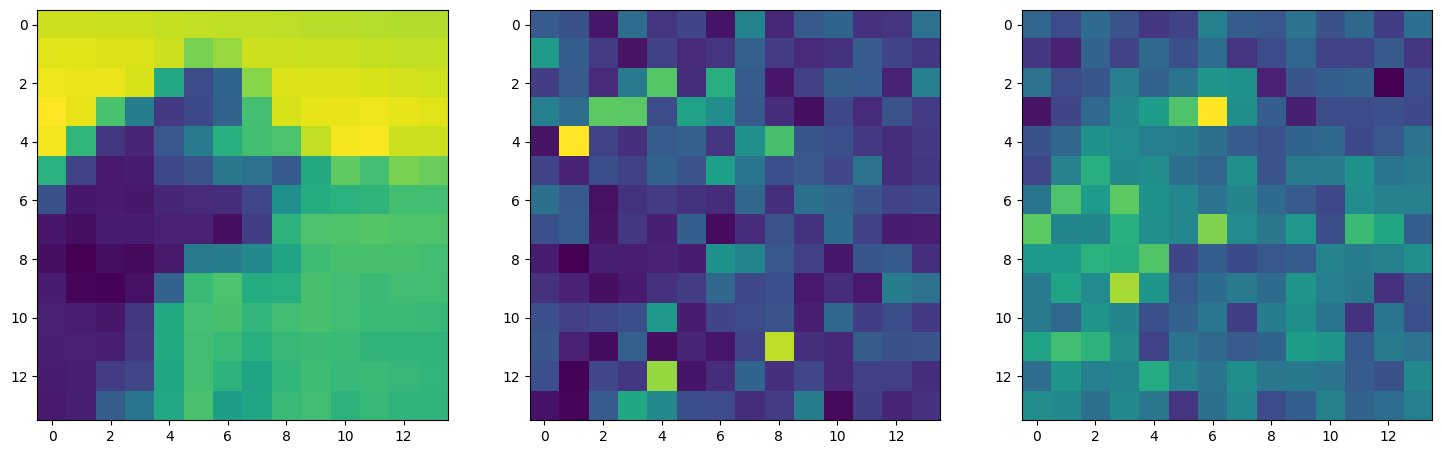

Step 140, Total loss 0.000000


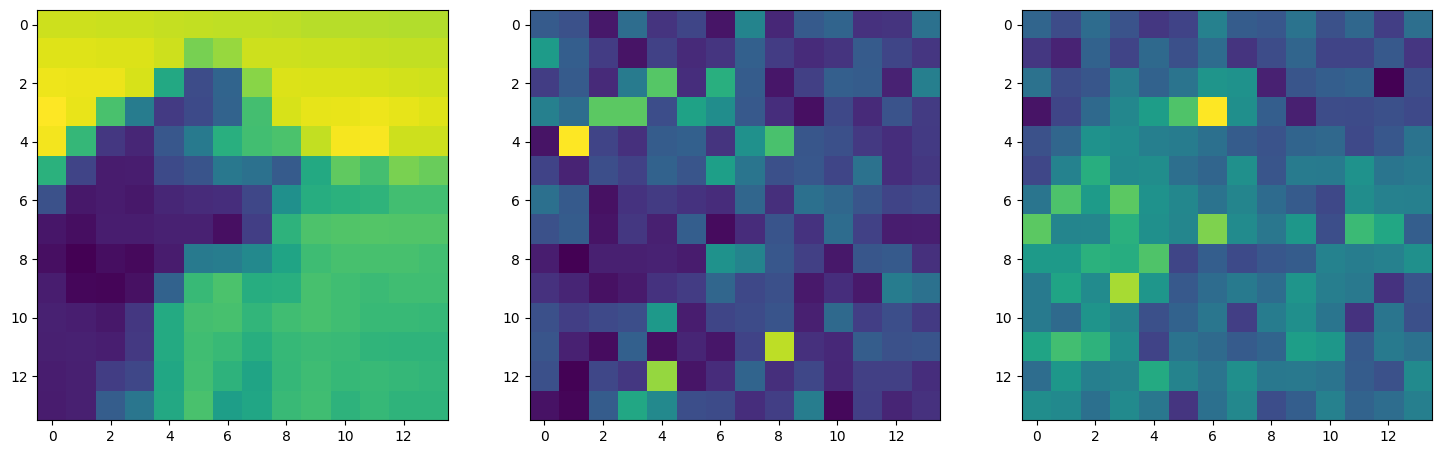

Step 150, Total loss 0.000000


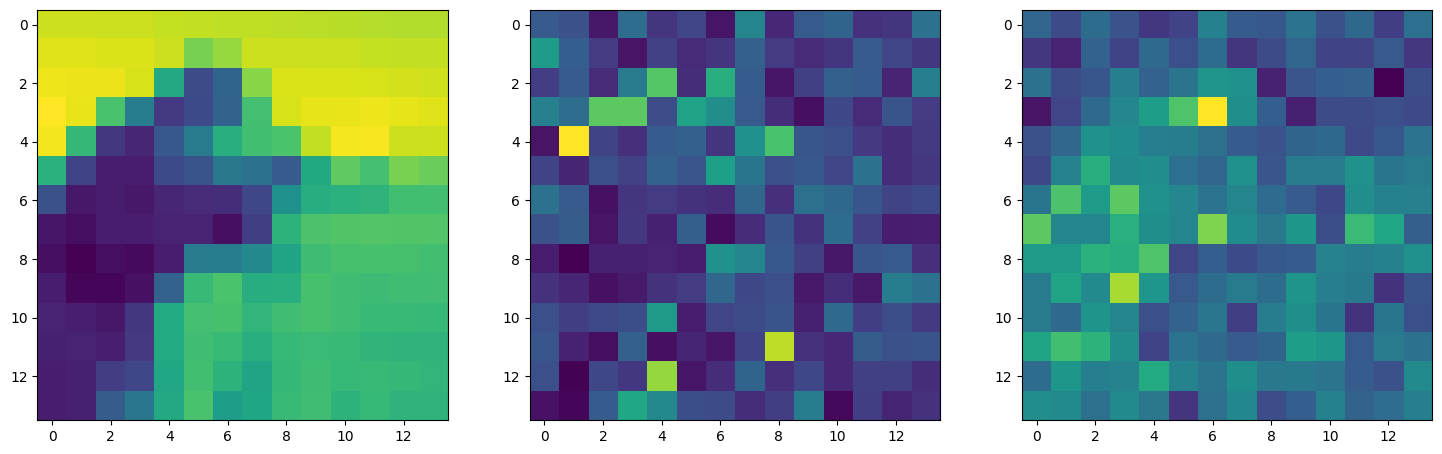

Step 160, Total loss 0.000000


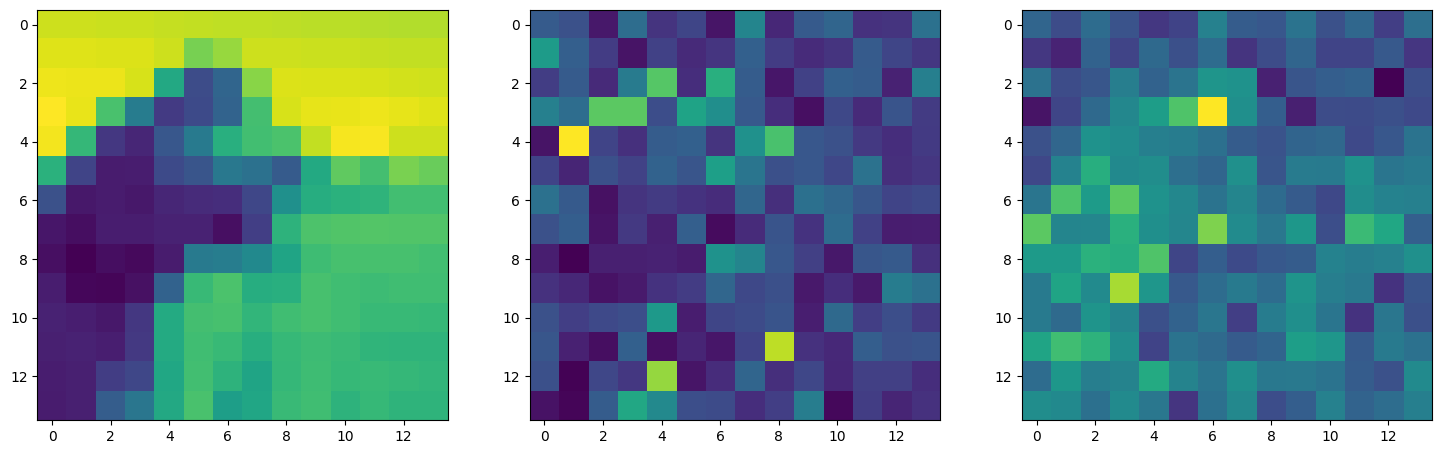

Step 170, Total loss 0.000000


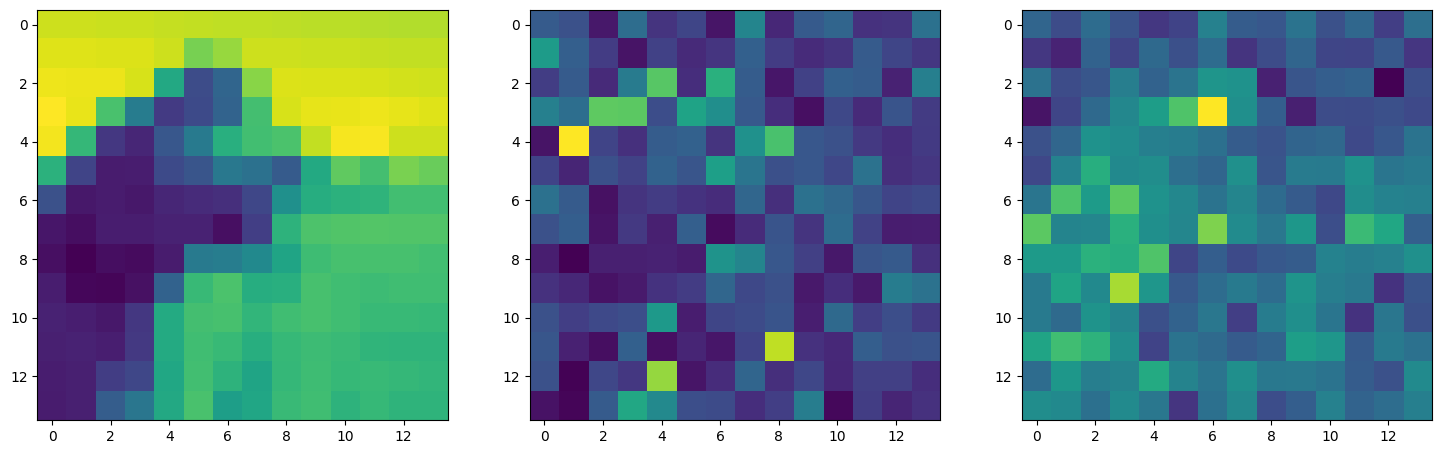

Step 180, Total loss 0.000000


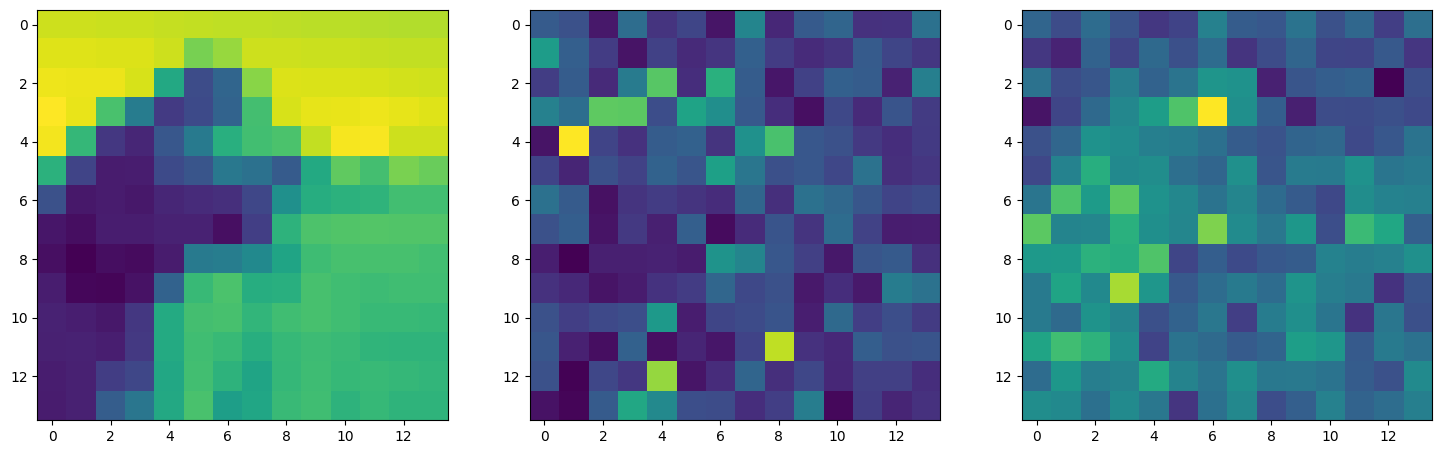

Step 190, Total loss 0.000000


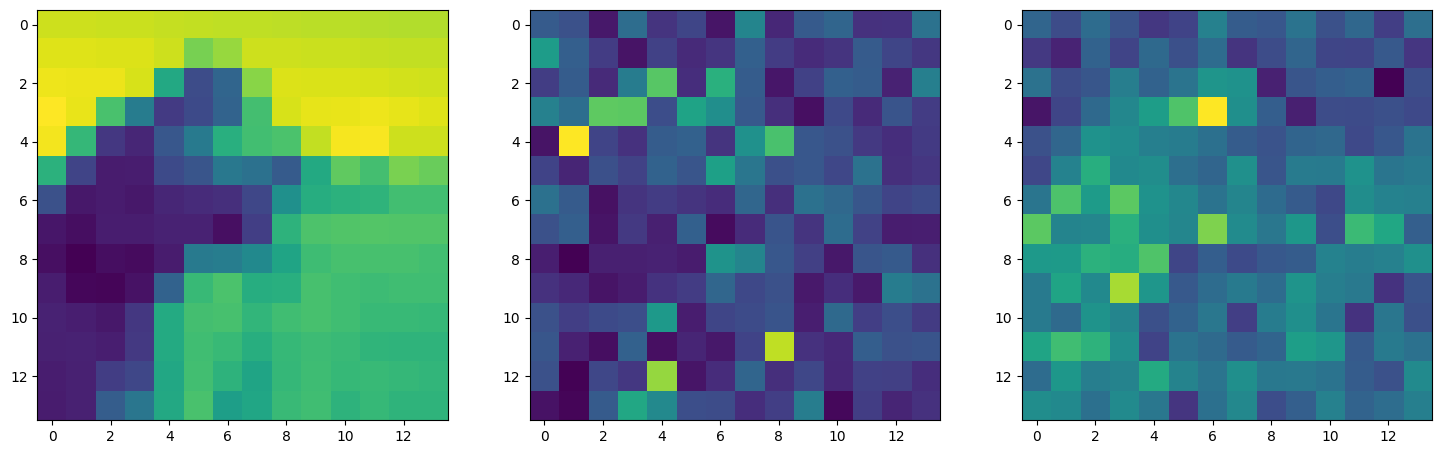

Step 200, Total loss 0.000000


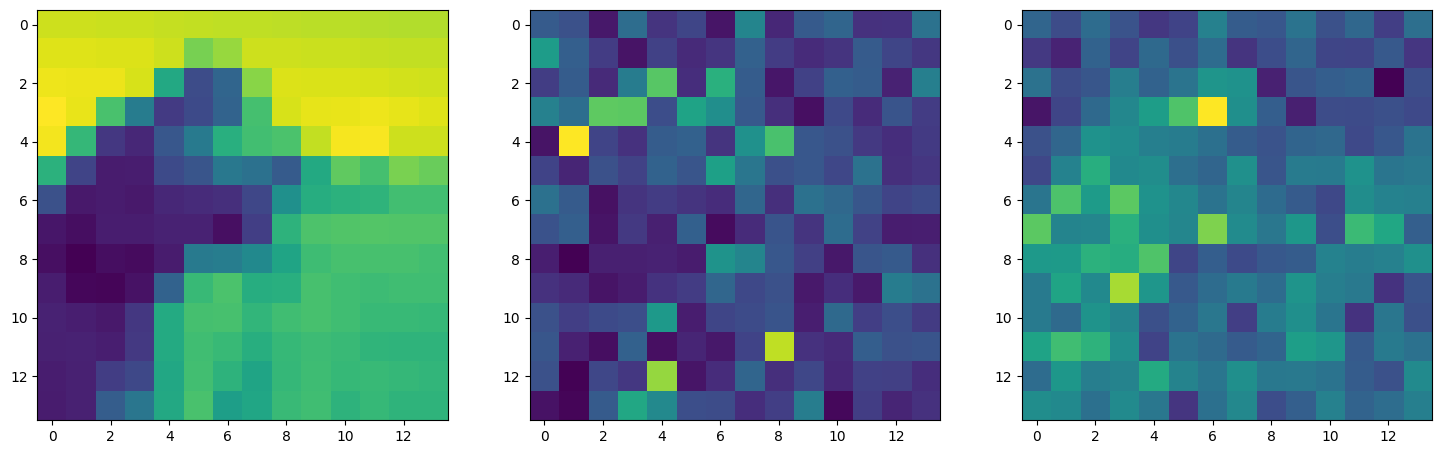

Step 210, Total loss 0.000000


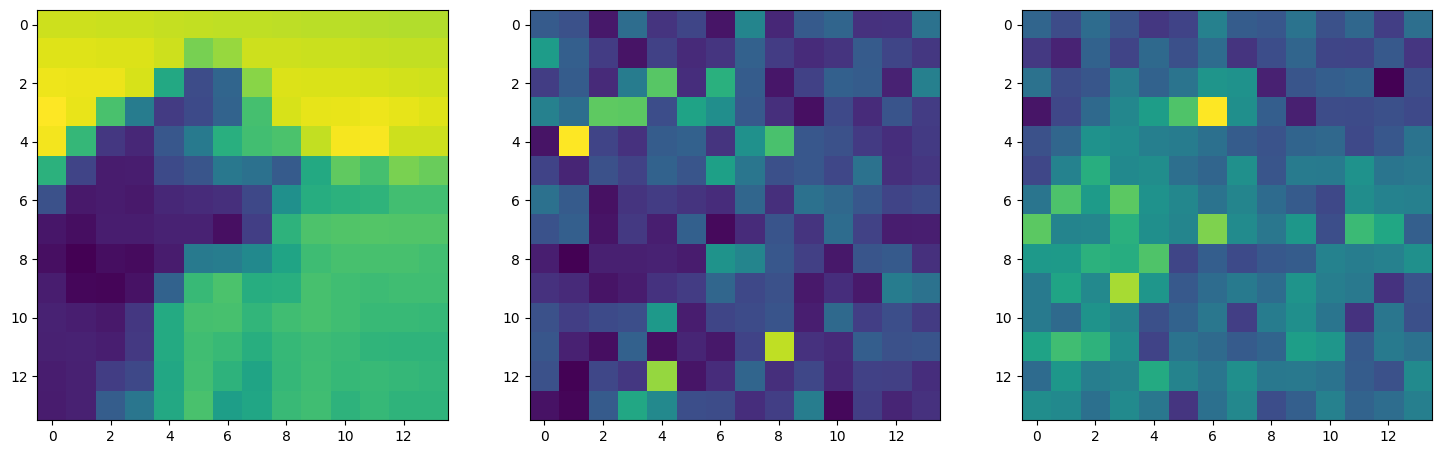

Step 220, Total loss 0.000000


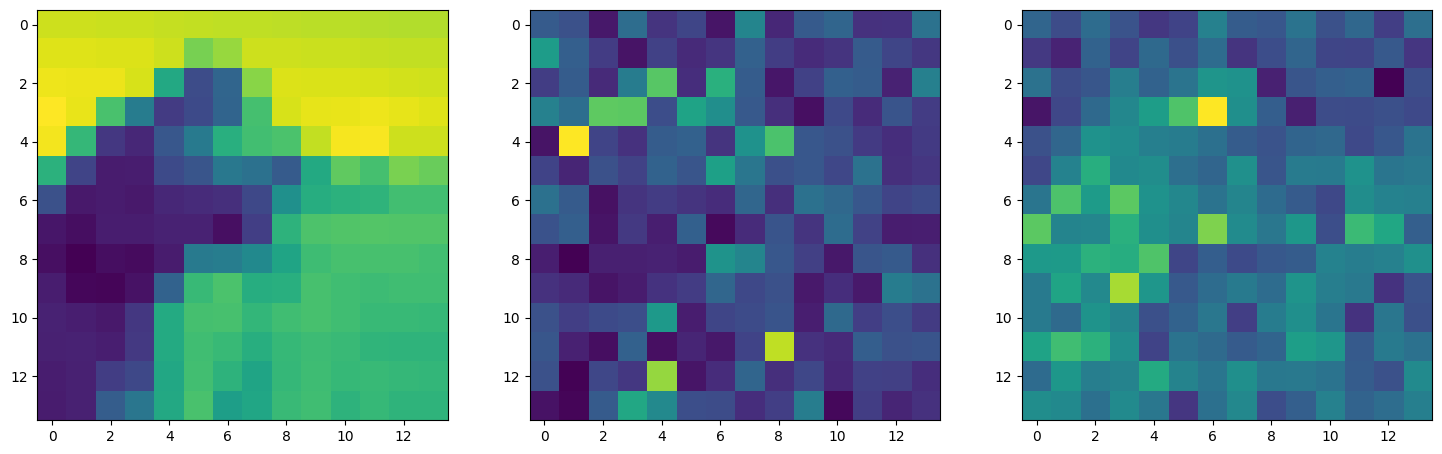

Step 230, Total loss 0.000000


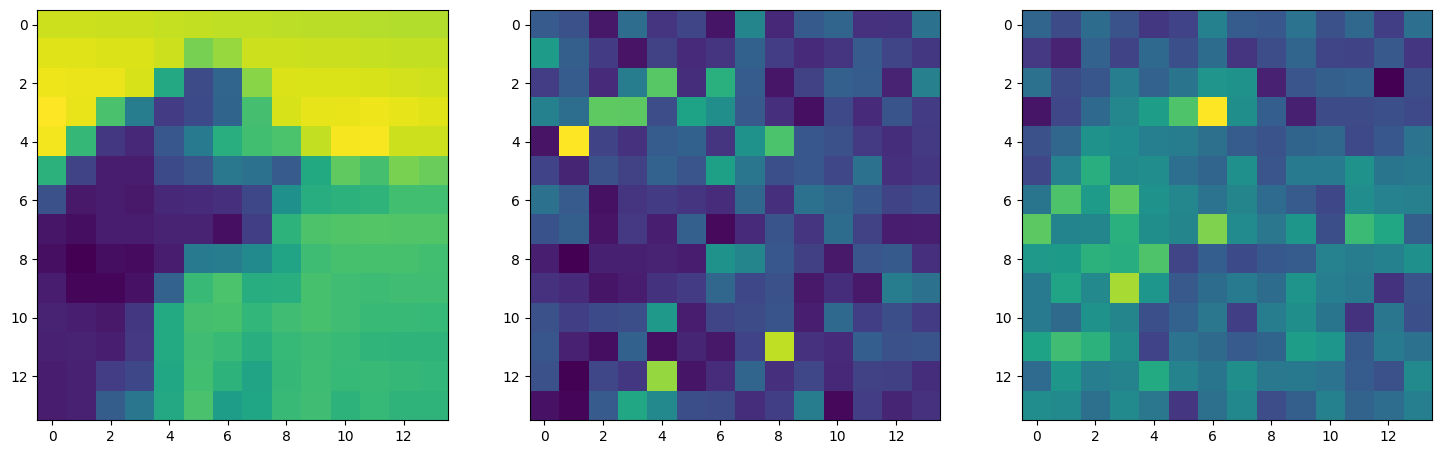

Step 240, Total loss 0.000000


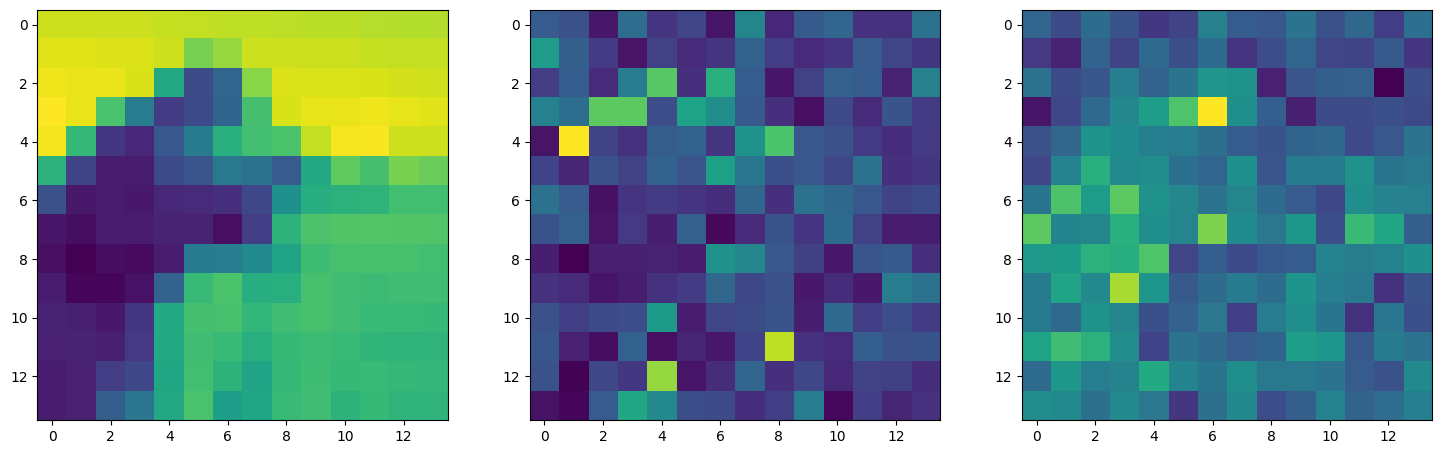

Step 250, Total loss 0.000000


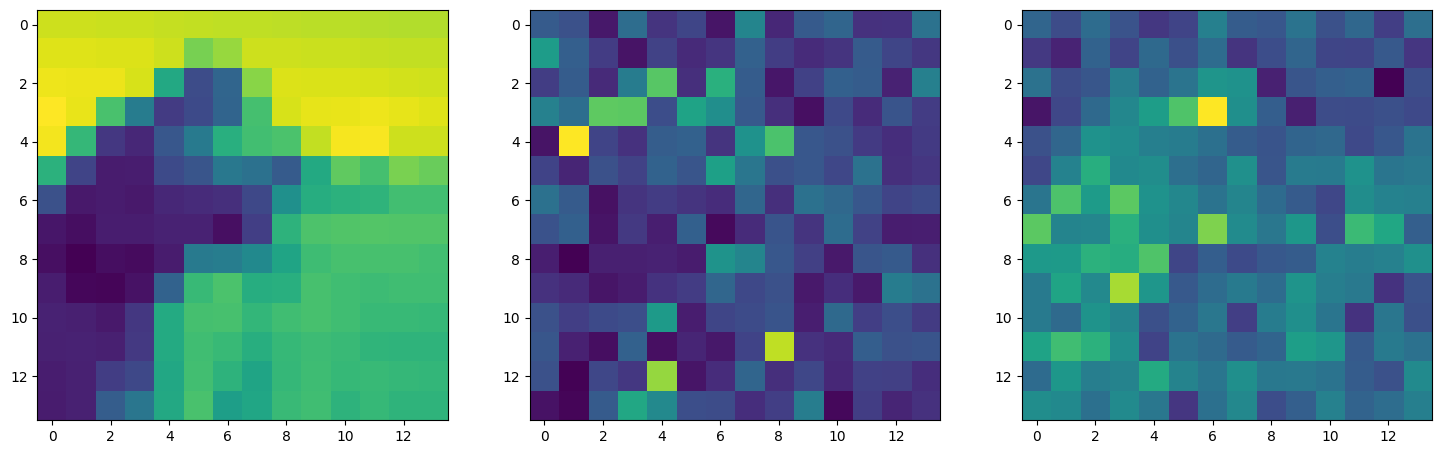

Step 260, Total loss 0.000000


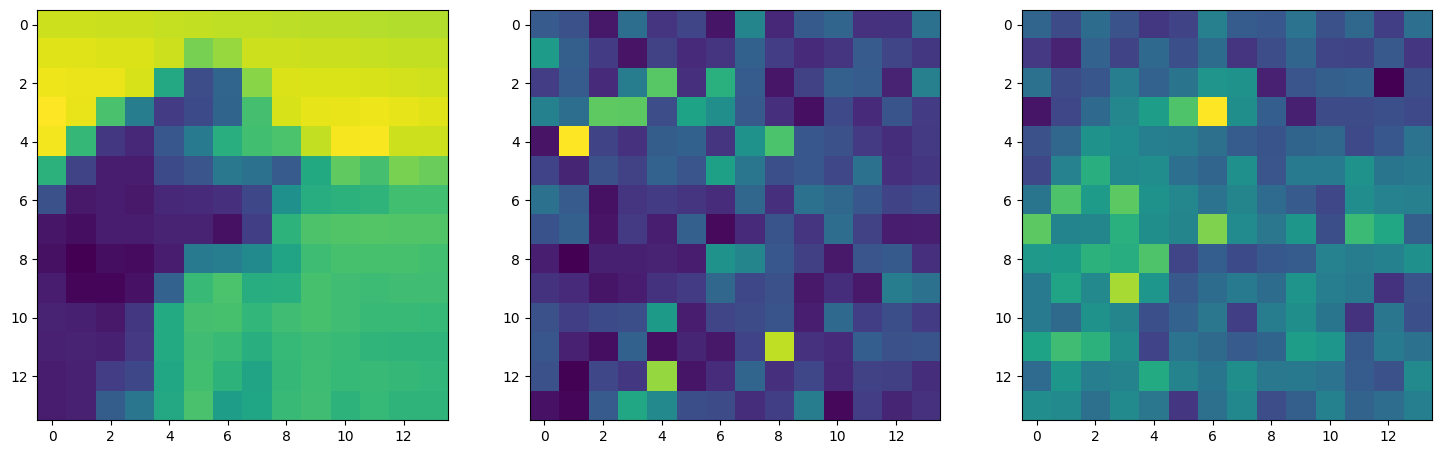

Step 270, Total loss 0.000000


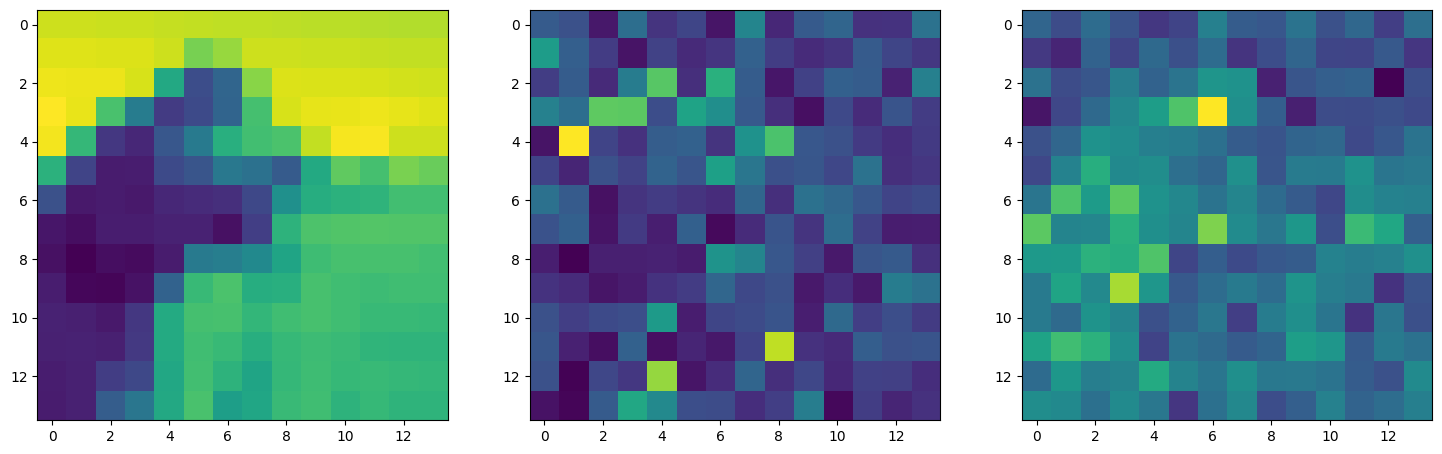

Step 280, Total loss 0.000000


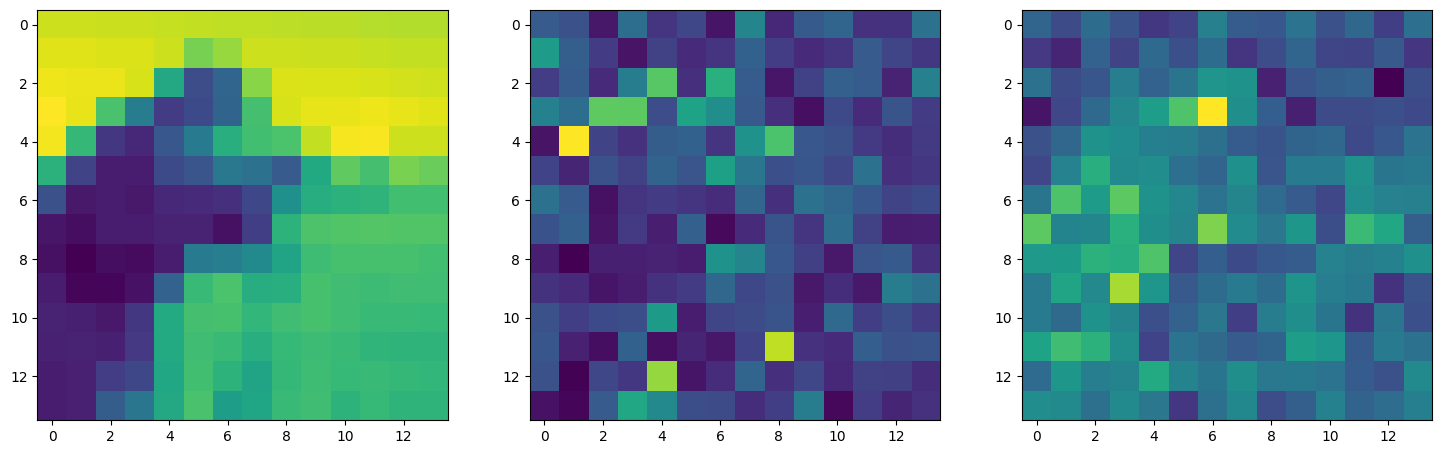

Step 290, Total loss 0.000000


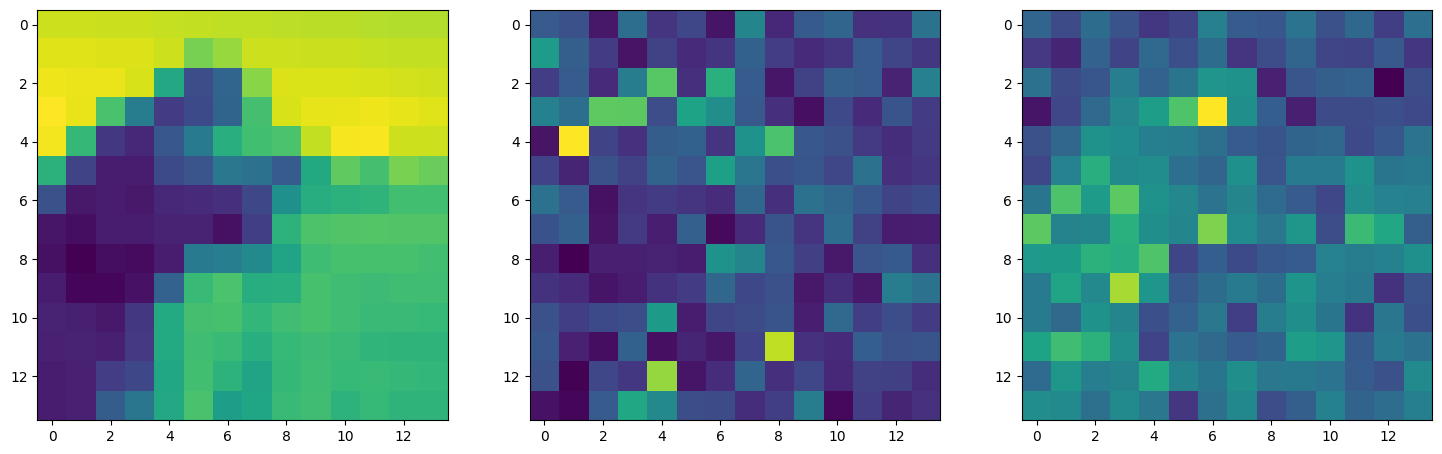

Step 300, Total loss 0.000000


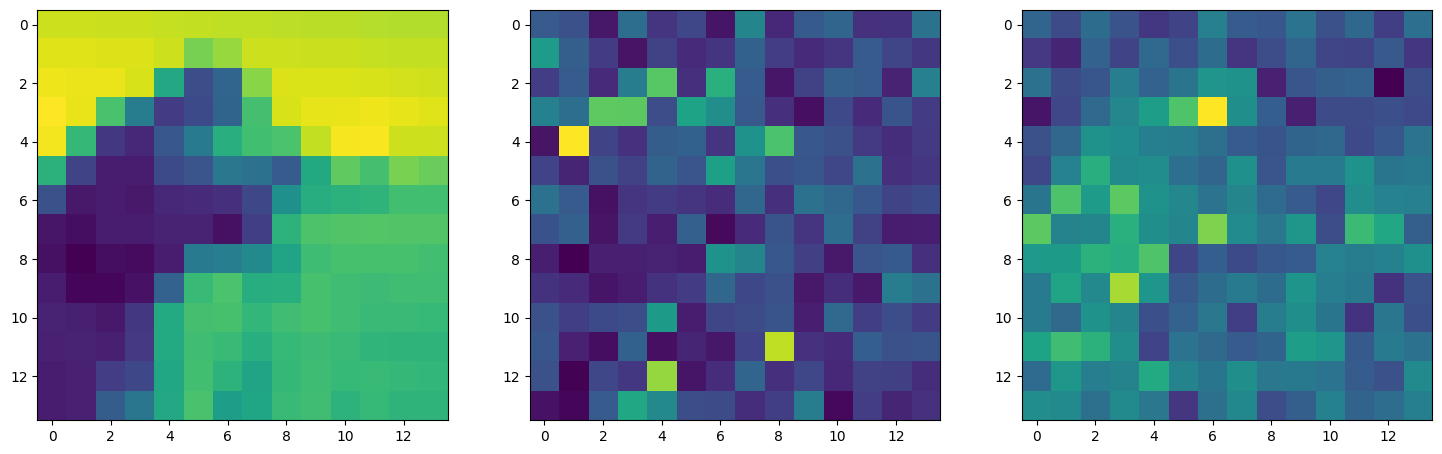

Step 310, Total loss 0.000000


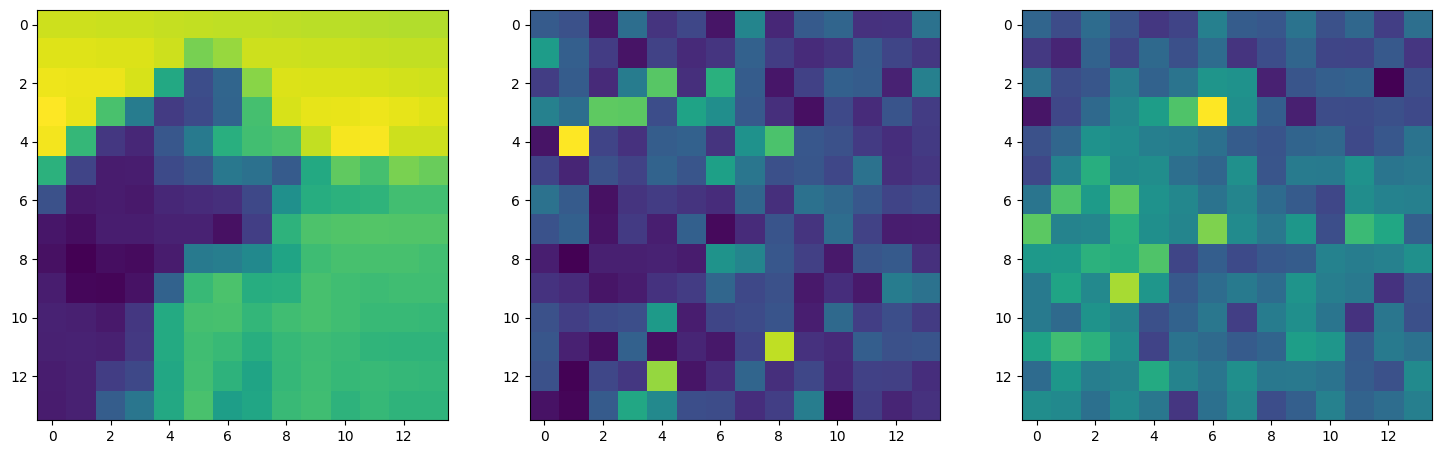

Step 320, Total loss 0.000000


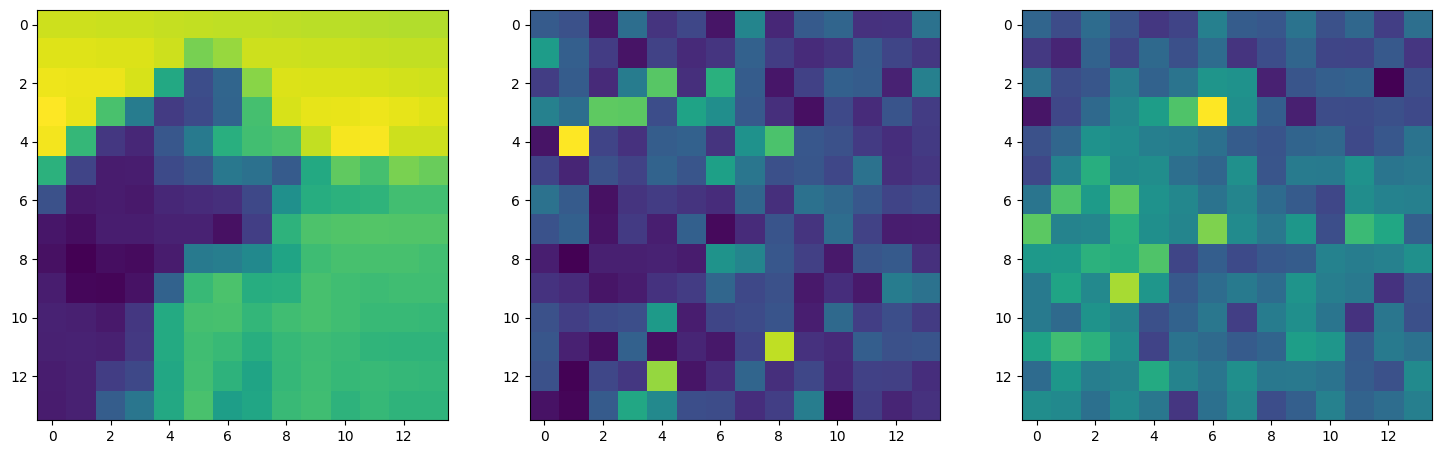

Step 330, Total loss 0.000000


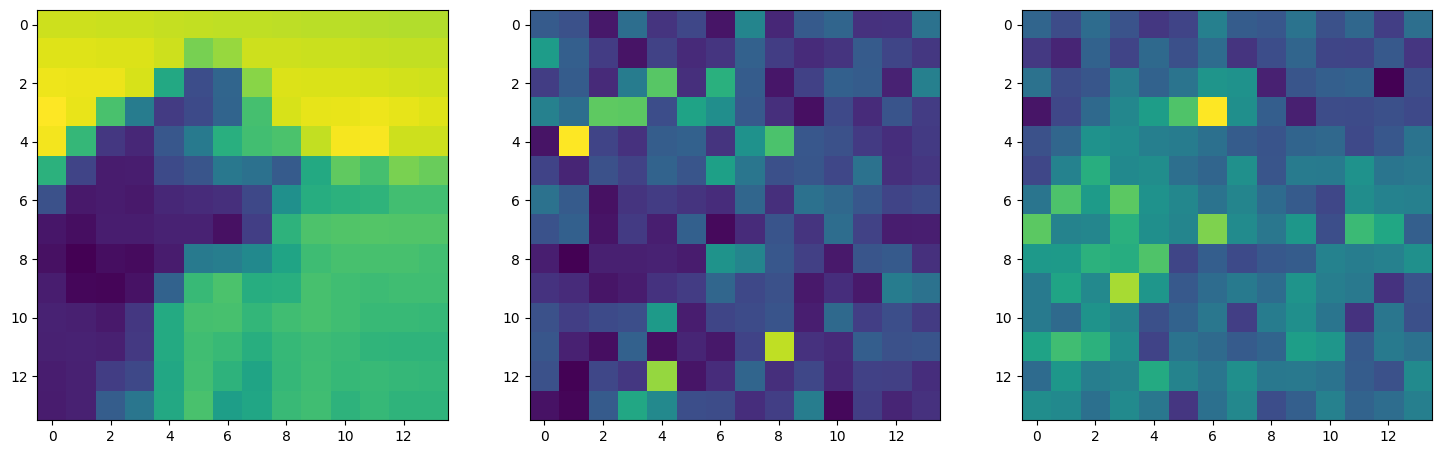

Step 340, Total loss 0.000000


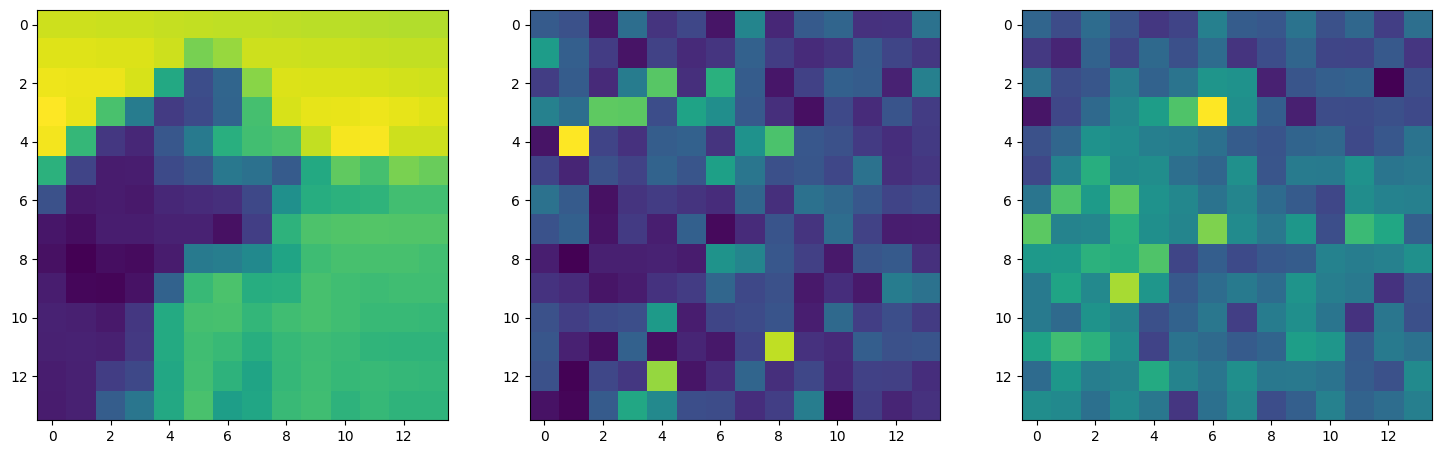

Step 350, Total loss 0.000000


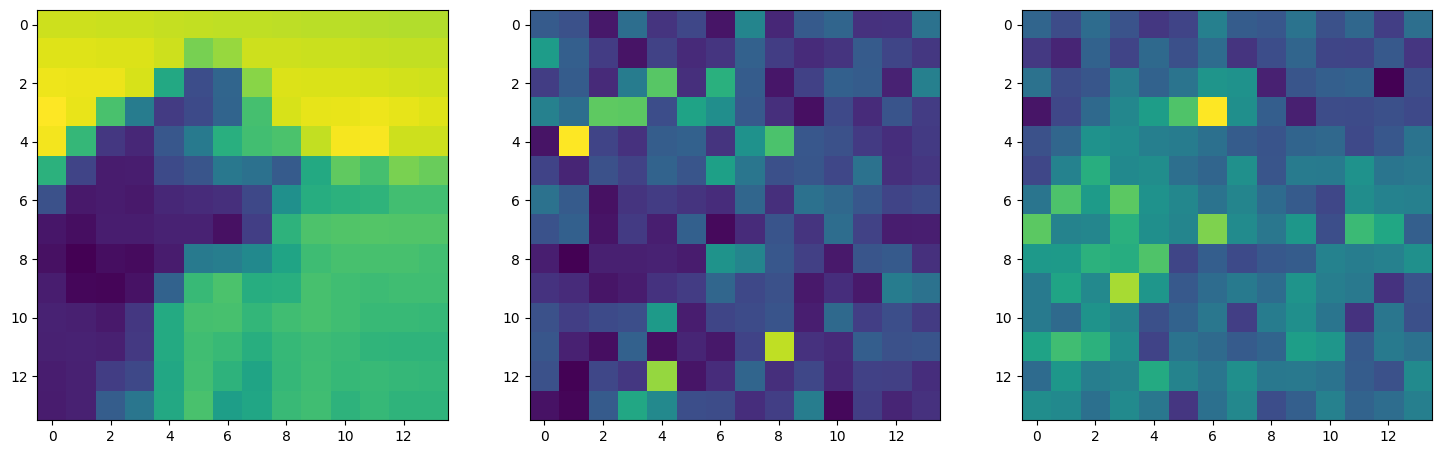

Step 360, Total loss 0.000000


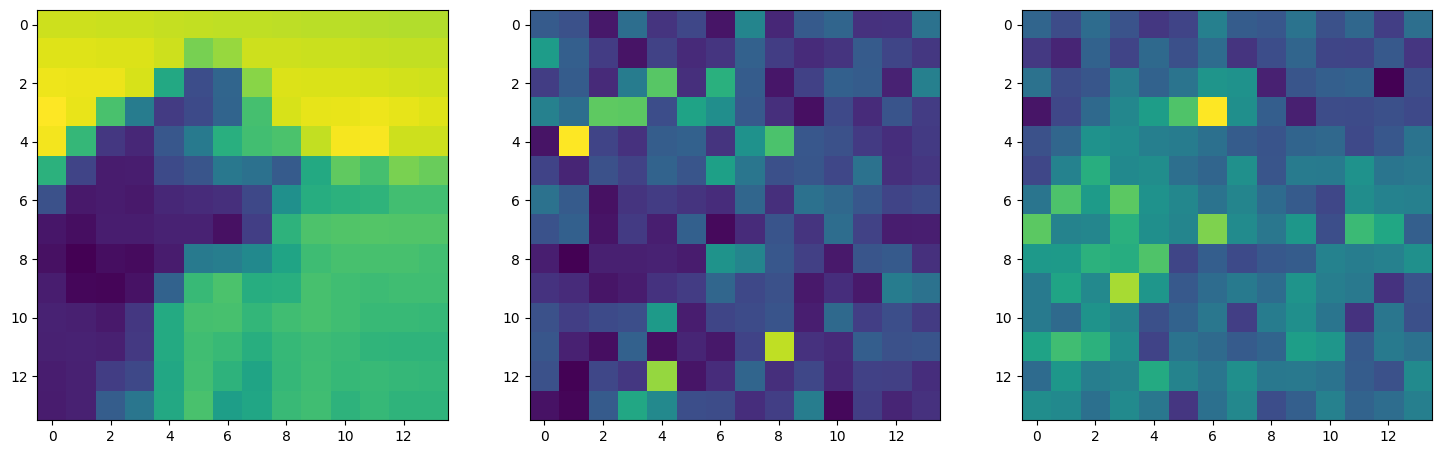

Step 370, Total loss 0.000000


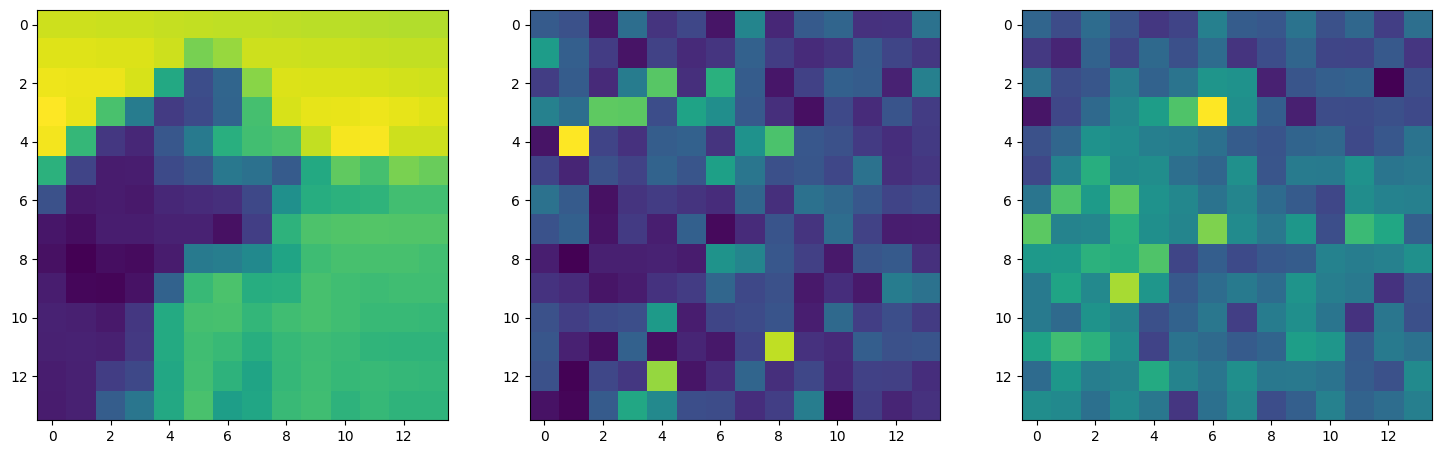

Step 380, Total loss 0.000000


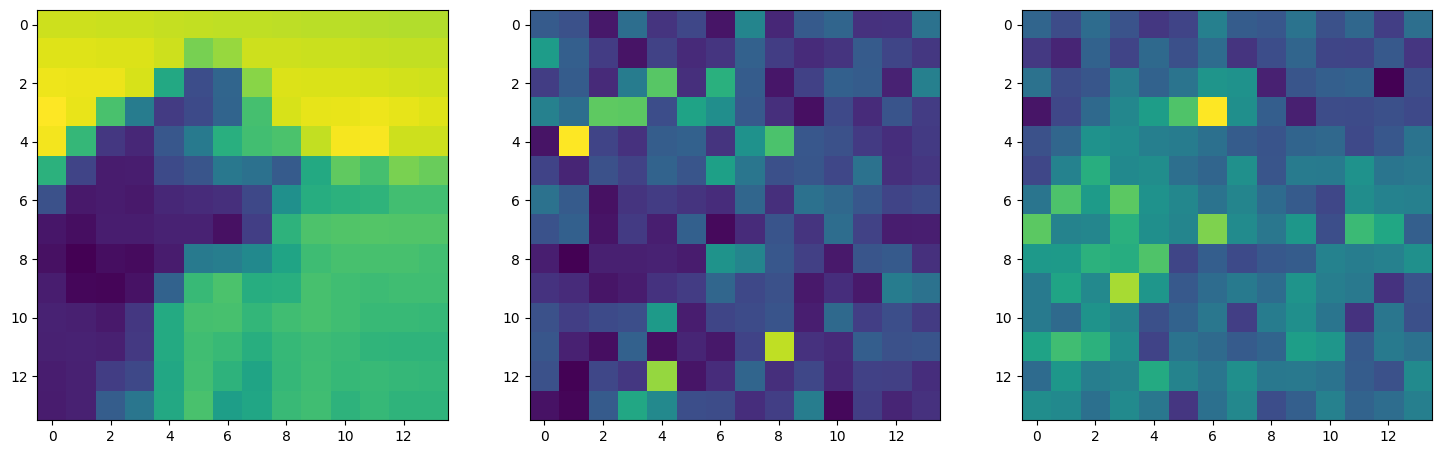

Step 390, Total loss 0.000000


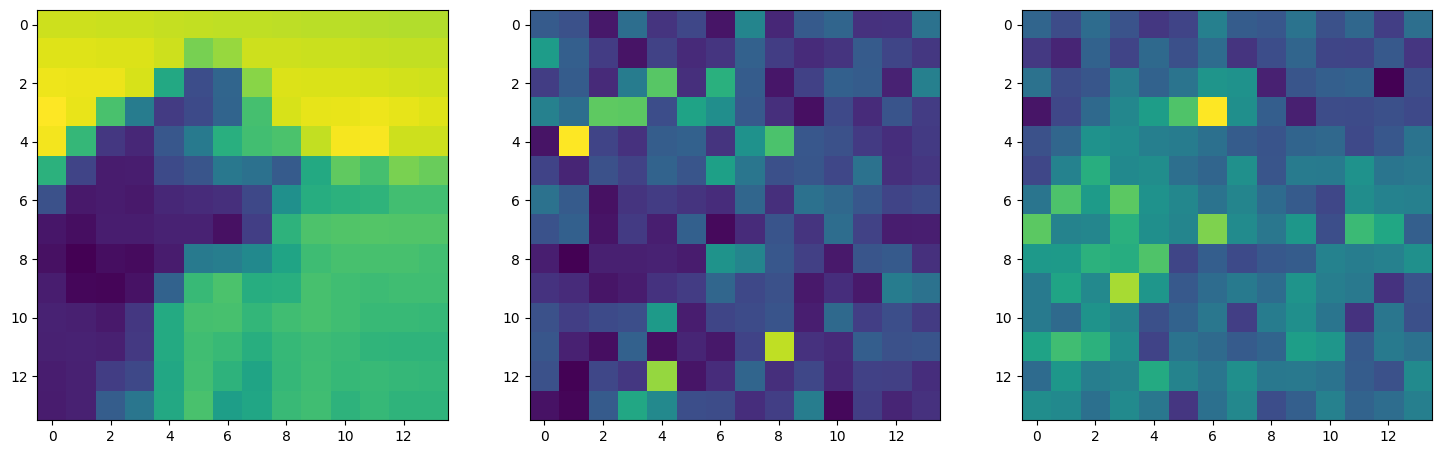

Step 400, Total loss 0.000000


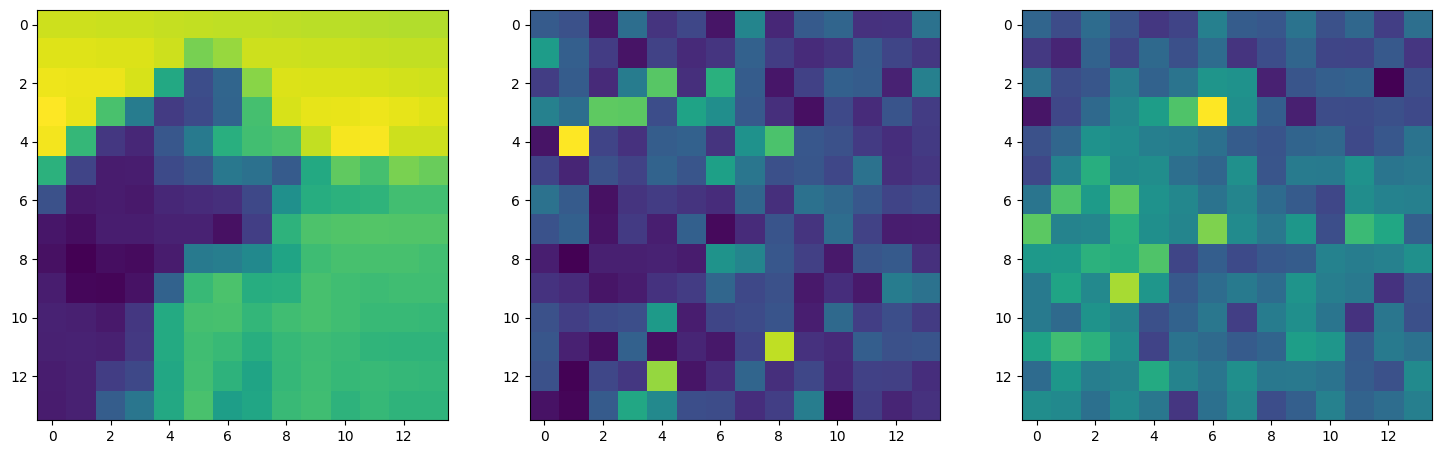

Step 410, Total loss 0.000000


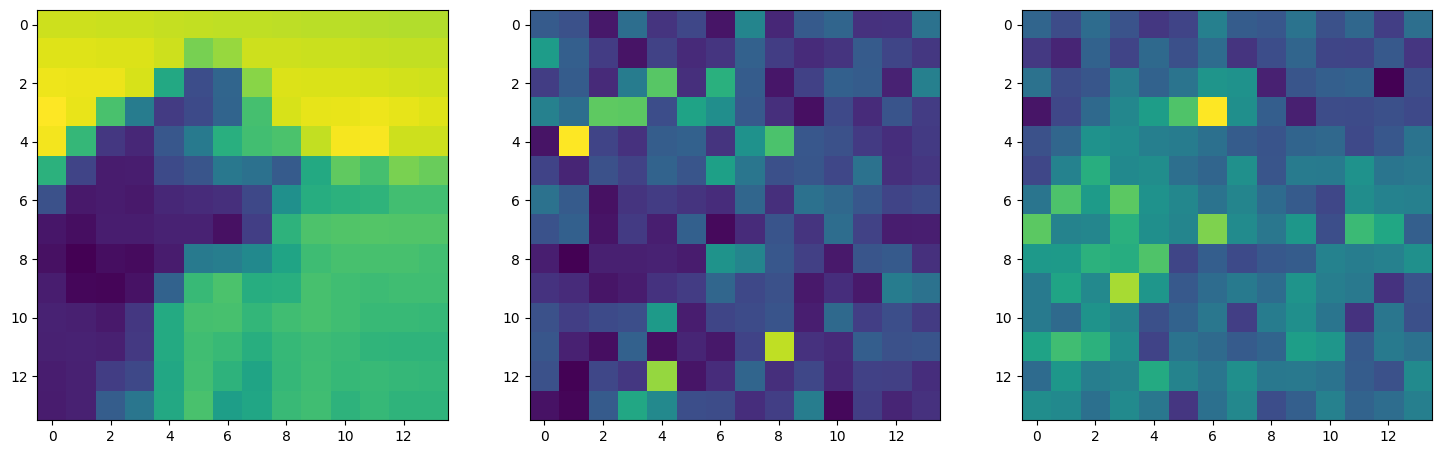

Step 420, Total loss 0.000000


KeyboardInterrupt: 

In [9]:
total_steps = 500 # Since the whole image is our dataset, this just means 500 gradient descent steps.
steps_til_summary = 10

optim = torch.optim.Adam(lr=1e-4, params=img_siren.parameters())

model_input, ground_truth = next(iter(dataloader))
model_input, ground_truth = model_input, ground_truth

fig, axes = plt.subplots(1,3, figsize=(18,6))
axes[0].imshow(ground_truth.cpu().view(sidelength,sidelength).detach().numpy())

for step in range(total_steps):
    model_output, coords = img_siren(model_input)
    loss = ((model_output - ground_truth)**2).mean()

    if not step % steps_til_summary:
        print("Step %d, Total loss %0.6f" % (step, loss))
        img_grad = gradient(model_output, coords)
        img_laplacian = laplace(model_output, coords)

        fig, axes = plt.subplots(1,3, figsize=(18,6))
        axes[0].imshow(model_output.cpu().view(sidelength,sidelength).detach().numpy())
        axes[1].imshow(img_grad.norm(dim=-1).cpu().view(sidelength,sidelength).detach().numpy())
        axes[2].imshow(img_laplacian.cpu().view(sidelength,sidelength).detach().numpy())
        plt.show()

    optim.zero_grad()
    loss.backward()
    optim.step()